# Table of Contents
<br>
<ol>
    <ol>
        <h2>1. <a href='#1' style="text-decoration : none; color : #000000;"> 50:50 Infected/Uninfected Users</a></h2>
        <ul>
            <a href='#1.A' style="text-decoration : none; color : #000000;"><h3>A. 80:20 Train Test Split </h3></a>
            <ul><a href='#1.A.A' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#1.B' style="text-decoration : none; color : #000000;"><h3>B. 80:20 Train Test Split with PCA </h3></a>
            <ul><a href='#1.B.B' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
     </ol>
    <br>
    <ol>
        <h2>2. <a href='#2' style="text-decoration : none; color : #000000;"> 70:30 Uninfected/Infected Users</a></h2>
        <ul>
            <a href='#2.A' style="text-decoration : none; color : #000000;"><h3>A. 80:20 Train Test Split </h3></a>
            <ul><a href='#2.A.A' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#2.B' style="text-decoration : none; color : #000000;"><h3>A. 80:20 Train Test Split with PCA </h3></a>
            <ul><a href='#2.B.B' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
     </ol>
</ol>

In [69]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import missingno as msno
import pprint
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
pd.set_option("display.max_columns",80)
pd.set_option('display.max_rows', 1200)
warnings.filterwarnings("ignore")

from IPython.display import HTML


import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss,classification_report
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier

<a id='1' style="text-decoration : none; color : #000000;"><h3>1.50:50 Infected/Uninfected Users</h3.</a>

In [2]:
z=pd.read_csv('Feature_with_Hour_Class_Dest.csv')
z.set_index(['Source_User'],drop=True,inplace=True)

In [5]:
z.columns=['Number of Records','Average Size of Packets Received','Average Size of Packets Sent','Average Elapsed Time',
           'Average number of Bytes sent', 'Average number of Bytes received','Number of different Source Ports',
           'Number of different Destination Ports', 'Number of different Applications','Number of different Source IP',
           'Number of different Destination IP','Target','Average differnce in Received Time',
          'Number of Sessions at 00:00','Number of Sessions at 01:00','Number of Sessions at 02:00','Number of Sessions at 03:00',
          'Number of Sessions at 04:00','Number of Sessions at 05:00','Number of Sessions at 06:00',
          'Number of Sessions at 07:00','Number of Sessions at 08:00','Number of Sessions at 09:00',
          'Number of Sessions at 10:00','Number of Sessions at 11:00','Number of Sessions at 12:00',
          'Number of Sessions at 13:00','Number of Sessions at 14:00','Number of Sessions at 15:00',
          'Number of Sessions at 16:00','Number of Sessions at 17:00','Number of Sessions at 18:00',
          'Number of Sessions at 19:00','Number of Sessions at 20:00','Number of Sessions at 21:00',
          'Number of Sessions at 22:00','Number of Sessions at 23:00']

In [26]:
print("The feature vector for infected users and sample of uninfected users")

The feature vector for infected users and sample of uninfected users


In [30]:
z=z.sample(frac=1)
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

,Number of Records,Average Size of Packets Received,Average Size of Packets Sent,Average Elapsed Time,Average number of Bytes sent,Average number of Bytes received,Number of different Source Ports,Number of different Destination Ports,Number of different Applications,Number of different Source IP,Number of different Destination IP,Average differnce in Received Time,Number of Sessions at 00:00,Number of Sessions at 01:00,Number of Sessions at 02:00,Number of Sessions at 03:00,Number of Sessions at 04:00,Number of Sessions at 05:00,Number of Sessions at 06:00,Number of Sessions at 07:00,Number of Sessions at 08:00,Number of Sessions at 09:00,Number of Sessions at 10:00,Number of Sessions at 11:00,Number of Sessions at 12:00,Number of Sessions at 13:00,Number of Sessions at 14:00,Number of Sessions at 15:00,Number of Sessions at 16:00,Number of Sessions at 17:00,Number of Sessions at 18:00,Number of Sessions at 19:00,Number of Sessions at 20:00,Number of Sessions at 21:00,Number of Sessions at 22:00,Number of Sessions at 23:00
Source_User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9167fa13e48069a3e72592e19101009c1b34336b6c0ea7402053ecdbc097aabf,3888,70.892490,42.355967,69.507973,5447.638374,78587.574846,3520.0,13.0,41,20,863,683.602366,310,327,377,451,83,44,87,53,143,102,83,77,91,206,70,216,125,165,142,152,127,134,171,152
8580546d5aa8f436ab86e4d987993e003d904ffc139a0306143c1b9c0b12554e,217,78.451613,15.746544,104.728111,3696.608295,90978.686636,216.0,4.0,16,19,99,10419.179724,0,0,0,0,0,0,0,0,0,141,22,9,17,1,4,11,1,2,6,2,1,0,0,0


In [31]:
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


Source_User
9167fa13e48069a3e72592e19101009c1b34336b6c0ea7402053ecdbc097aabf    1
8580546d5aa8f436ab86e4d987993e003d904ffc139a0306143c1b9c0b12554e    0
fa739ed9db5d83d4366e1ca4910217382f17ad90a0a53190230c8444b6ea7447    0
4b744228412bb075854fddc518844ad264efaeb5200101e29a69621adbb74b8e    0
3945a07aeac270ab0494ce64d18a92a5df1da1c8786f2765b6ec1629ded1b52f    1
4ad3fd2c76727a3a84d477e115a2806b6bd71f3d50fc7a6048d0566f6c328955    1
4d952363eb331f33165abef69c7c146f886cac8bc728b497e0b807b9b13b4eaa    1
192546952911dbf7d4351049d5cec1943847f31661981bfeaff996cc1492f9cf    1
de514deb8589fa3c50257aed702dbe179b8130309737da70dece9506352c9f23    1
bc6d844863948bd1acdc4667d5888e7111f1a9a0c5ad565c1bc3e1a677eb2979    1
Name: Target, dtype: int64

<a id='1.A' style="text-decoration : none; color : #000000;"><h3>80:20 Train/Test Split</h3.</a>

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [93]:
from pandas_ml import ConfusionMatrix
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())
    print("\nAccuracy of the ",model_name," model for training data is:",grid.best_score_)

def get_cm(model,x,y):
    y_pred=model.predict(x)
    cm=ConfusionMatrix(y,y_pred)
    display(cm)
#     display(pd.crosstab(y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

def get_classification_report(model,x,y):
    print(classification_report(y,model.predict(x)))
    
def get_accuracy_plot(data,title=''):
    plt.figure(figsize=(12,8))
    plt.plot(data['accuracy'].values, '--o')
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Classifier', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    plt.xlim([0, 9])
    plt.title(title,size=18,y=1.05)
    plt.xticks(np.arange(10),data.index.get_values(),rotation=90)
    plt.legend(loc='upper right', fontsize=18)
    plt.show()

def grid(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=parameters,scoring='accuracy',cv=kfold)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    print("\nConfusion Matrix for Training data is:")
    get_cm(grid_search,x,y)
    print("Accuracy of the ",model_name," model for test data is:",accuracy_score(y_test,grid_search.predict(x_test)))
    print("\nConfusion Matrix for test data is:")
    get_cm(grid_search,x_test,y_test)
    
    return grid_search    

In [41]:
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,manhattan,30,uniform



Accuracy of the  KNN  model for training data is: 0.755658436214

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          715   242      957
1          212   775      987
__all__    927  1017     1944

Accuracy of the  KNN  model for test data is: 0.767489711934

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          201   57      258
1           56  172      228
__all__    257  229      486

In [42]:
knn=KNeighborsClassifier(n_neighbors=30,weights='uniform',leaf_size=2,metric='manhattan',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_80_50_train.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_80_50_test.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [39]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.3,False,True,0.7,50,ovr,l2,sag,0.1



Accuracy of the  Logistic  model for training data is: 0.74537037037

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          722  235      957
1          251  736      987
__all__    973  971     1944

Accuracy of the  Logistic  model for test data is: 0.759259259259

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          203   55      258
1           62  166      228
__all__    265  221      486

In [43]:
logistic=LogisticRegression(C=0.3,dual=False,fit_intercept=True,intercept_scaling=0.7,max_iter=50,multi_class='ovr',penalty='l2',solver='sag',tol=0.1)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_80_50_train.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_80_50_test.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [45]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.760802469136


Predicted    0     1  __all__
Actual                       
0          678   279      957
1          186   801      987
__all__    864  1080     1944

Accuracy of Random Forest Model on test data is: 0.775720164609


Predicted    0    1  __all__
Actual                      
0          196   62      258
1           47  181      228
__all__    243  243      486

In [46]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)

cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_80_50_train.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_80_50_test.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

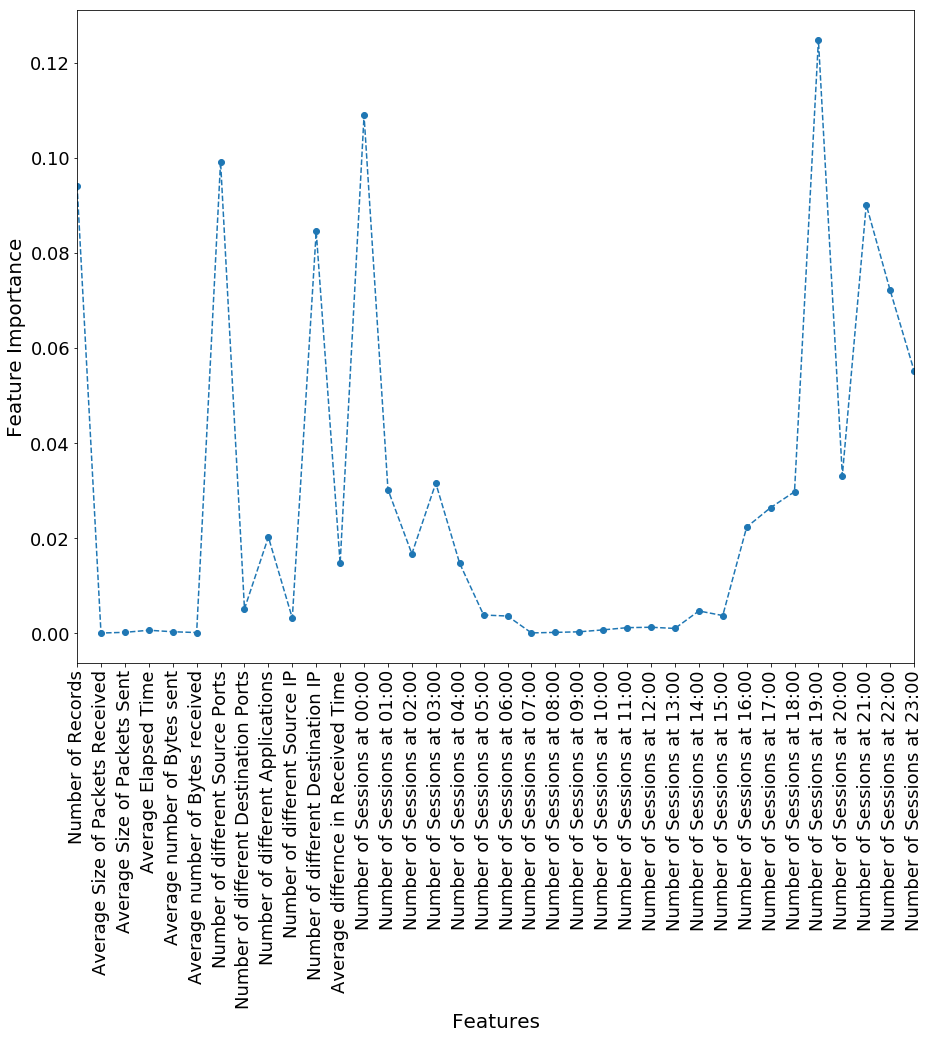

In [54]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [48]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME,0.5,50,0



Accuracy of the  AdaBoostClassifier  model for training data is: 0.753086419753

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          649   308      957
1          155   832      987
__all__    804  1140     1944

Accuracy of the  AdaBoostClassifier  model for test data is: 0.769547325103

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          186   72      258
1           40  188      228
__all__    226  260      486

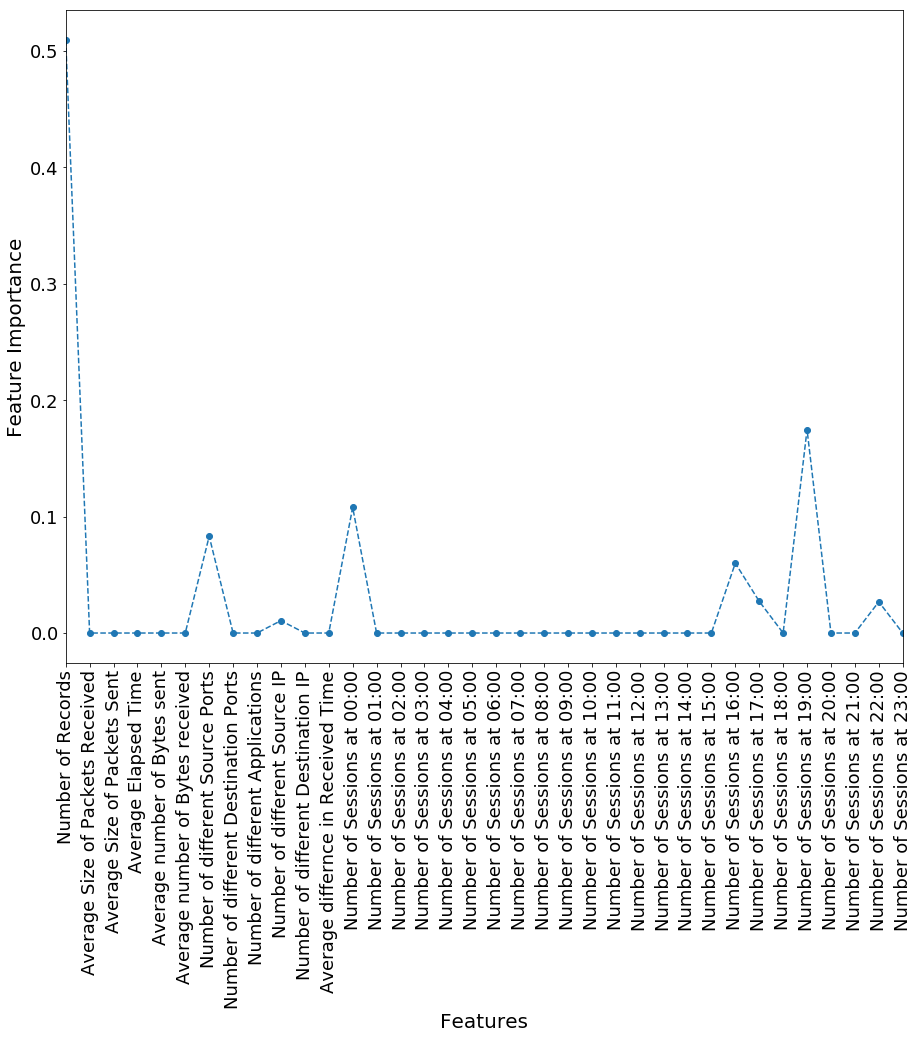

In [55]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.5,n_estimators=50,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_80_50_train.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_80_50_test.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [51]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


,0,1,2,3,4,5,6
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state
0,mse,0.03,deviance,10,0.1,50,0



Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.764917695473

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          674   283      957
1          144   843      987
__all__    818  1126     1944

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.788065843621

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          187   71      258
1           32  196      228
__all__    219  267      486

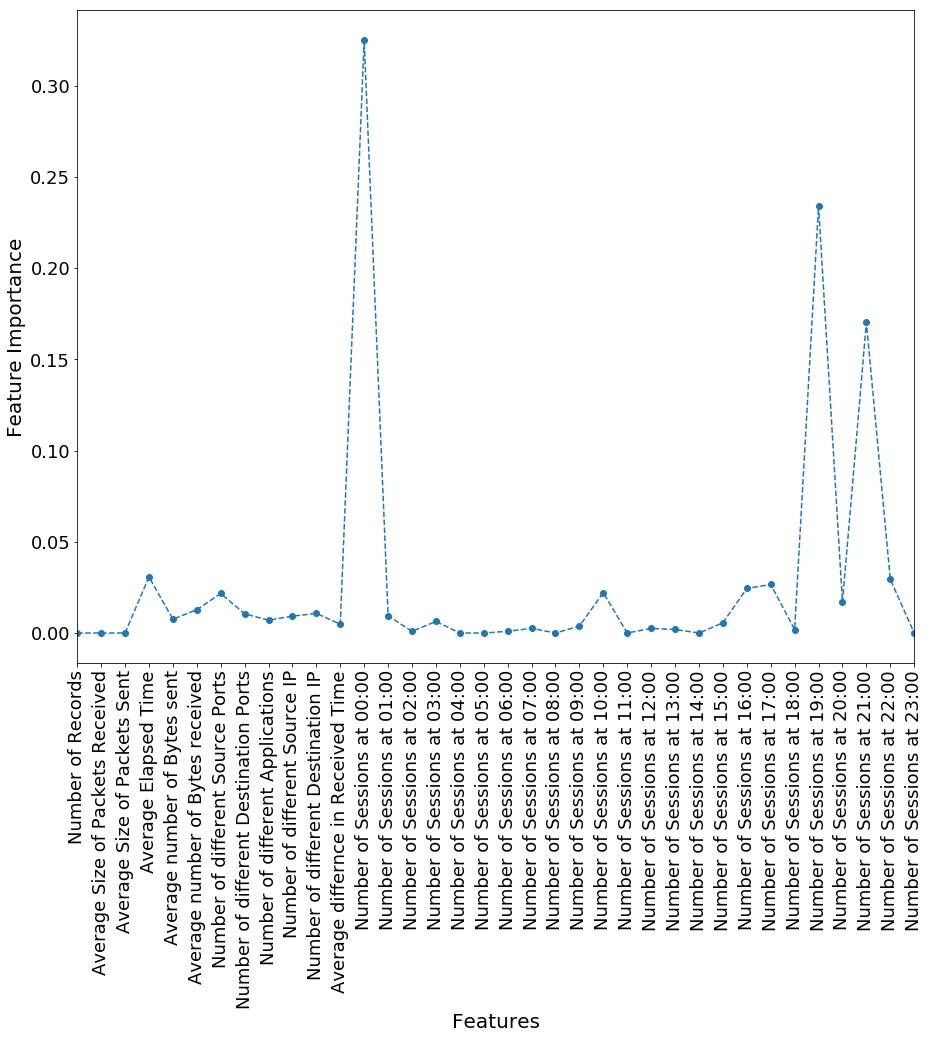

In [56]:
gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=10,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_80_50_train.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_80_50_test.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [57]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,gini,10,auto,0.1,2,2,0,best



Accuracy of the  Extra Decision Tree  model for training data is: 0.748456790123

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          666   291      957
1          186   801      987
__all__    852  1092     1944

Accuracy of the  Extra Decision Tree  model for test data is: 0.77366255144

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          195   63      258
1           47  181      228
__all__    242  244      486

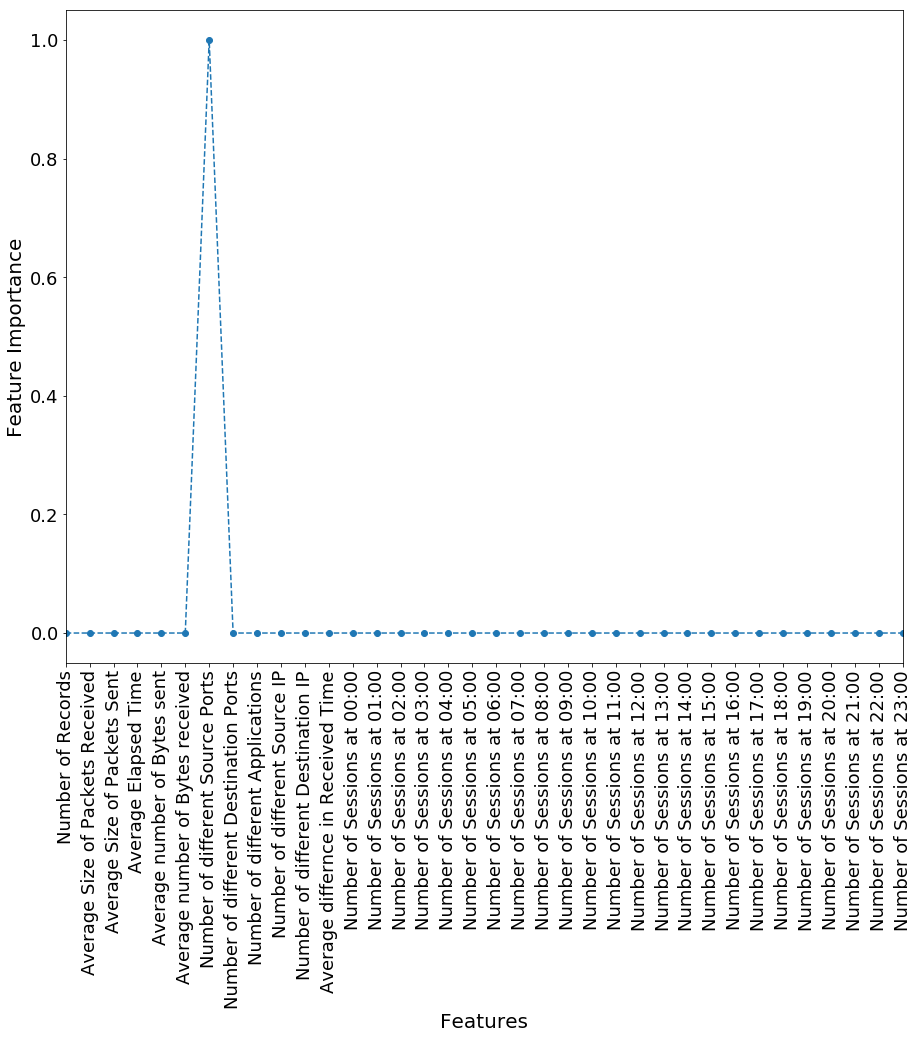

In [58]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.1,min_samples_leaf=5,
                            min_samples_split=2,random_state=0,splitter='best')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_80_50_train.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_80_50_test.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [59]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.4,0.3,1000,True,0



Accuracy of the  Bagging  model for training data is: 0.759259259259

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          799   158      957
1           84   903      987
__all__    883  1061     1944

Accuracy of the  Bagging  model for test data is: 0.786008230453

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          191   67      258
1           37  191      228
__all__    228  258      486

In [61]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_80_50_train.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_80_50_test.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [66]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.775205761317


Predicted    0     1  __all__
Actual                       
0          695   262      957
1          175   812      987
__all__    870  1074     1944

The test accuracy is: 0.781893004115


Predicted    0    1  __all__
Actual                      
0          195   63      258
1           43  185      228
__all__    238  248      486

In [68]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_80_50_train.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_80_50_test.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [70]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 0.940329218352


Predicted     0    1  __all__
Actual                       
0           933   24      957
1            92  895      987
__all__    1025  919     1944

The accuracy of the model on test data is: 0.703703703704


Predicted    0    1  __all__
Actual                      
0          190   68      258
1           76  152      228
__all__    266  220      486

In [71]:
table_80_50_train.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_80_50_test.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [72]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.2min finished


The accuracy of the model on training data is: 0.791666666667


In [80]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted    0     1  __all__
Actual                       
0          700   257      957
1          148   839      987
__all__    848  1096     1944

The accuracy of the model on test data is: 0.761316872428


Predicted    0    1  __all__
Actual                      
0          190   68      258
1           48  180      228
__all__    238  248      486

In [81]:
table_80_50_train.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_80_50_test.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [82]:
table_80_50_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

<a id='1.A.A' style="text-decoration : none; color : #000000;"><h3>Comparision Table and Graphs </h3></a>

In [83]:
print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.766461,775.0,715.0,242.0,212.0,0.214792,0.252874
LogisticRegression,0.750000,732.0,726.0,231.0,255.0,0.258359,0.241379
RandomForestClassifier,0.760802,801.0,678.0,279.0,186.0,0.188450,0.291536
AdaBoostClassifier,0.761831,832.0,649.0,308.0,155.0,0.157042,0.321839
GradientBoostingClassifier,0.780350,843.0,674.0,283.0,144.0,0.145897,0.295716
ExtraTreeClassifier,0.754630,801.0,666.0,291.0,186.0,0.188450,0.304075
BaggingClassifier,0.875514,903.0,799.0,158.0,84.0,0.085106,0.165099
VotingClassifier,0.775206,812.0,695.0,262.0,175.0,0.177305,0.273772
Neural Network-1,0.940329,895.0,933.0,24.0,92.0,0.093212,0.025078


In [85]:
print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.767490,172.0,201.0,57.0,56.0,0.245614,0.220930
LogisticRegression,0.755144,165.0,202.0,56.0,63.0,0.276316,0.217054
RandomForestClassifier,0.775720,181.0,196.0,62.0,47.0,0.206140,0.240310
AdaBoostClassifier,0.769547,188.0,186.0,72.0,40.0,0.175439,0.279070
GradientBoostingClassifier,0.788066,196.0,187.0,71.0,32.0,0.140351,0.275194
ExtraTreeClassifier,0.773663,181.0,195.0,63.0,47.0,0.206140,0.244186
BaggingClassifier,0.786008,191.0,191.0,67.0,37.0,0.162281,0.259690
VotingClassifier,0.781893,185.0,195.0,63.0,43.0,0.188596,0.244186
Neural Network-1,0.703704,152.0,190.0,68.0,76.0,0.333333,0.263566


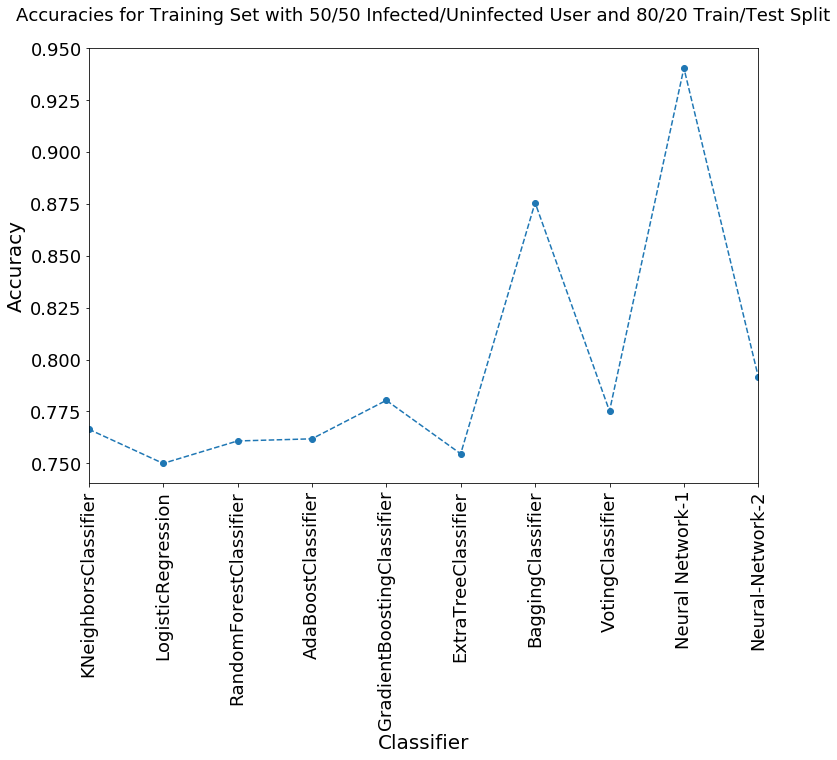

In [97]:
get_accuracy_plot(table_80_50_train,'Accuracies for Training Set with 50/50 Infected/Uninfected User and 80/20 Train/Test Split')

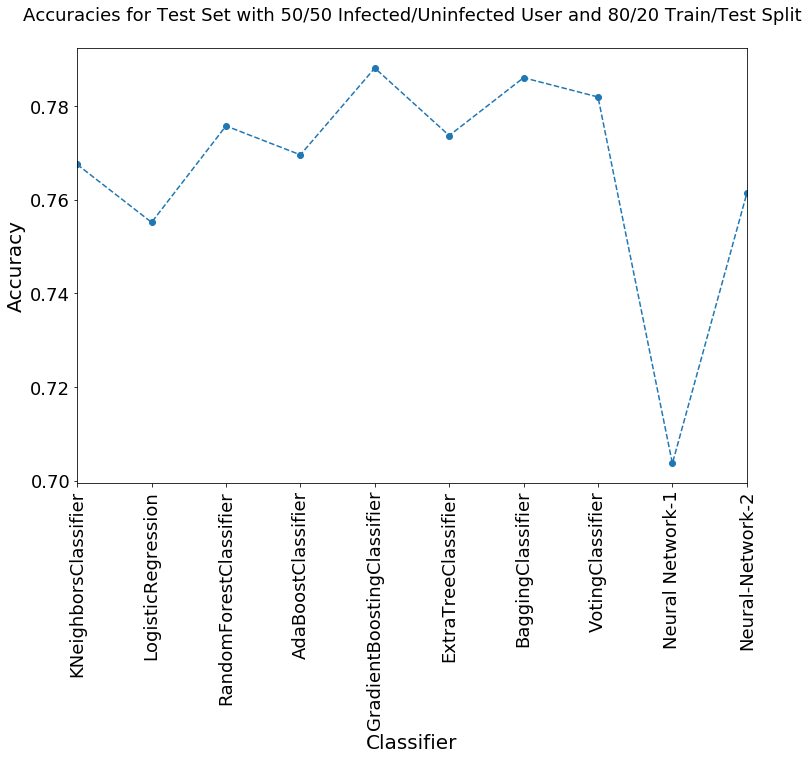

In [98]:
get_accuracy_plot(table_80_50_test,'Accuracies for Test Set with 50/50 Infected/Uninfected User and 80/20 Train/Test Split')

<a id='1.B' style="text-decoration : none; color : #000000;"><h3>80:20 Train/Test Split with PCA</h3.</a>

In [101]:
### With the PCA
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.2)

Variance explained using 13 components is: 0.885937278413
The train/test split ratio is 80:20


In [102]:
table_80_50_train_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,euclidean,30,distance



Accuracy of the  KNN  model for training data is: 0.748456790123

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          957    0      957
1            0  987      987
__all__    957  987     1944

Accuracy of the  KNN  model for test data is: 0.761316872428

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          198   60      258
1           56  172      228
__all__    254  232      486

In [104]:
knn=KNeighborsClassifier(n_neighbors=30,weights='uniform',leaf_size=2,metric='euclidean',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_80_50_train_PCA.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_80_50_test_PCA.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [105]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.5,False,True,0.5,50,multinomial,l2,newton-cg,1e-05



Accuracy of the  Logistic  model for training data is: 0.747942386831

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          706   251      957
1          230   757      987
__all__    936  1008     1944

Accuracy of the  Logistic  model for test data is: 0.759259259259

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          203   55      258
1           62  166      228
__all__    265  221      486

In [106]:
logistic=LogisticRegression(C=0.5,dual=False,fit_intercept=True,intercept_scaling=0.5,max_iter=50,multi_class='multinomial',penalty='l2',solver='newton-cg',tol=1e-5)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_80_50_train_PCA.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_80_50_test_PCA.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [107]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.75462962963


Predicted    0     1  __all__
Actual                       
0          627   330      957
1          147   840      987
__all__    774  1170     1944

Accuracy of Random Forest Model on test data is: 0.763374485597


Predicted    0    1  __all__
Actual                      
0          177   81      258
1           34  194      228
__all__    211  275      486

In [108]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)

cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_80_50_train_PCA.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_80_50_test_PCA.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

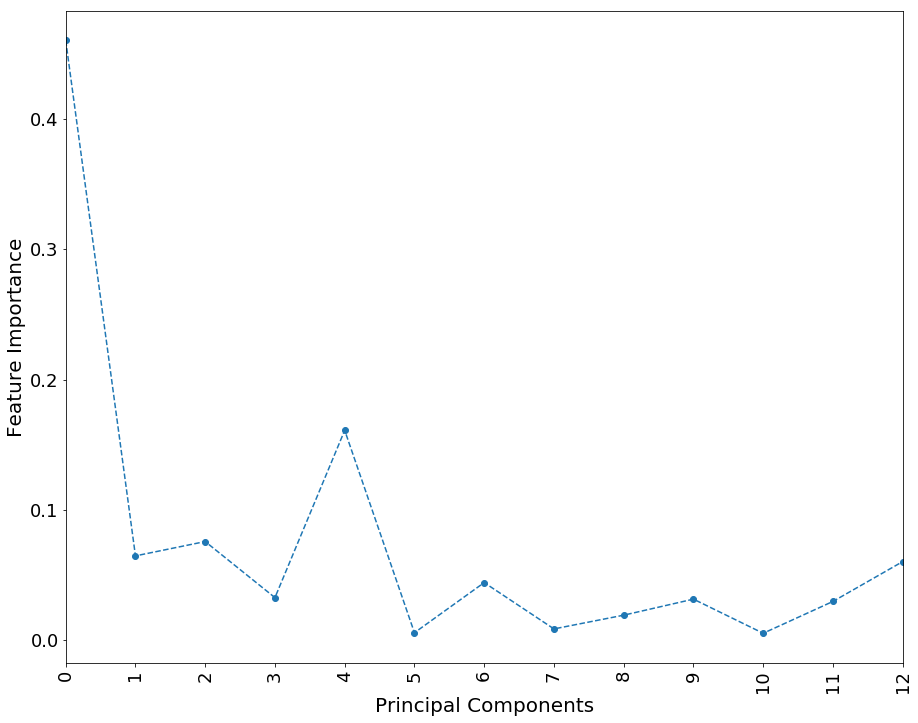

In [119]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [114]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME,0.5,50,0



Accuracy of the  AdaBoostClassifier  model for training data is: 0.744855967078

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          640   317      957
1          164   823      987
__all__    804  1140     1944

Accuracy of the  AdaBoostClassifier  model for test data is: 0.769547325103

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          190   68      258
1           44  184      228
__all__    234  252      486

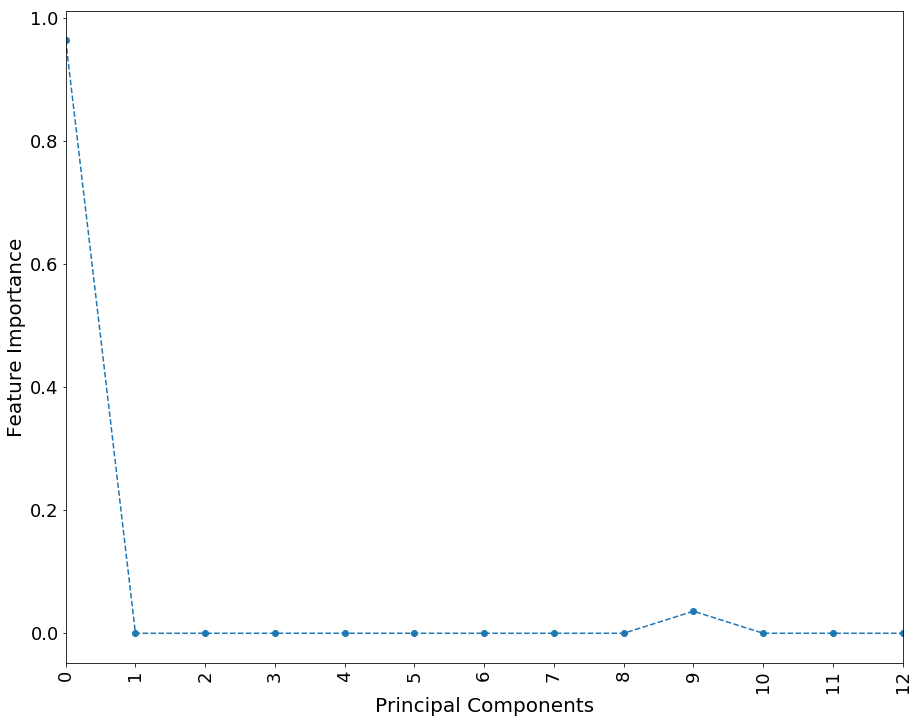

In [118]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.5,n_estimators=50,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_80_50_train_PCA.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_80_50_test_PCA.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [124]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50,100,200], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


,0,1,2,3,4,5,6
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state
0,mse,0.03,exponential,15,0.1,100,0



Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.755658436214

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          684   273      957
1          159   828      987
__all__    843  1101     1944

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.775720164609

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          194   64      258
1           45  183      228
__all__    239  247      486

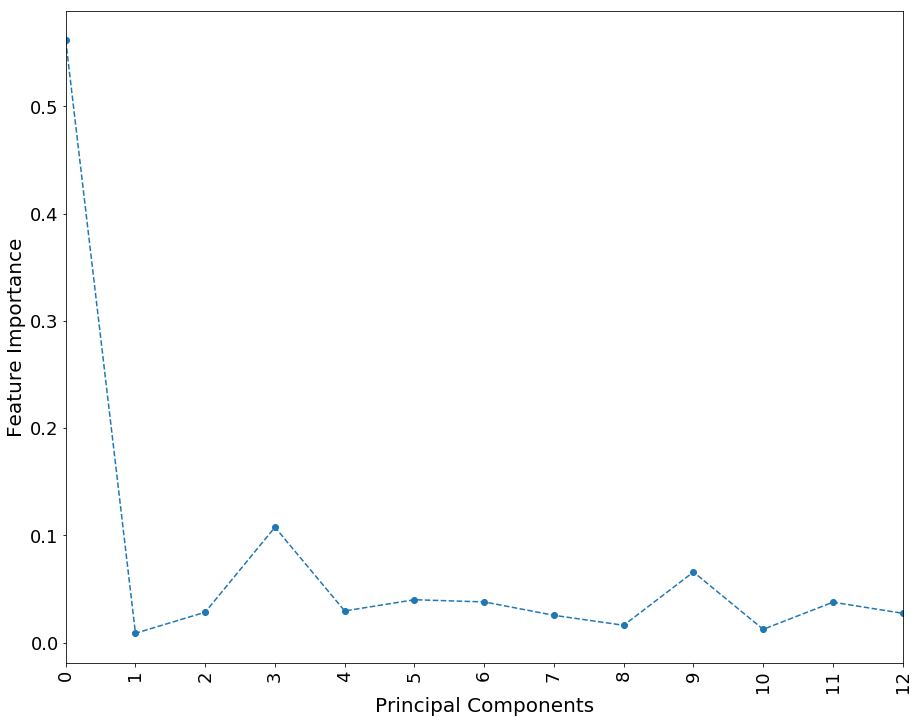

In [125]:
gbc=GradientBoostingClassifier(n_estimators=100,min_samples_leaf=15,min_samples_split=0.1,random_state=0,loss='exponential',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_80_50_train_PCA.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_80_50_test_PCA.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [126]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,gini,20,auto,0.001,2,2,0,best



Accuracy of the  Extra Decision Tree  model for training data is: 0.715534979424

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          754   203      957
1          140   847      987
__all__    894  1050     1944

Accuracy of the  Extra Decision Tree  model for test data is: 0.713991769547

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          171   87      258
1           52  176      228
__all__    223  263      486

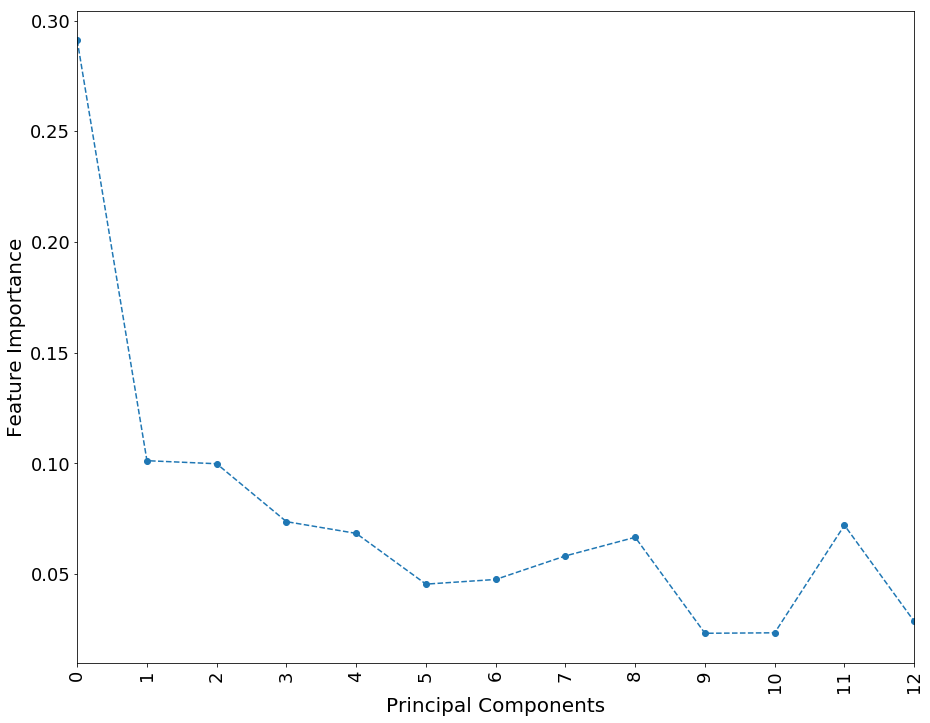

In [128]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=20,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=2,
                            min_samples_split=2,random_state=0,splitter='best')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_80_50_train_PCA.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_80_50_test_PCA.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [129]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.4,0.3,1000,True,0



Accuracy of the  Bagging  model for training data is: 0.747427983539

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          856   101      957
1           50   937      987
__all__    906  1038     1944

Accuracy of the  Bagging  model for test data is: 0.763374485597

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          181   77      258
1           38  190      228
__all__    219  267      486

In [130]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_80_50_train_PCA.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_80_50_test_PCA.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [131]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.784465020576


Predicted    0     1  __all__
Actual                       
0          691   266      957
1          153   834      987
__all__    844  1100     1944

The test accuracy is: 0.767489711934


Predicted    0    1  __all__
Actual                      
0          188   70      258
1           43  185      228
__all__    231  255      486

In [132]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_80_50_train_PCA.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_80_50_test_PCA.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [134]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 0.863168724035


Predicted    0    1  __all__
Actual                      
0          834  123      957
1          143  844      987
__all__    977  967     1944

The accuracy of the model on test data is: 0.724279835391


Predicted    0    1  __all__
Actual                      
0          184   74      258
1           60  168      228
__all__    244  242      486

In [135]:
table_80_50_train_PCA.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_80_50_test_PCA.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [136]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.6min finished


The accuracy of the model on training data is: 0.782407407407


In [137]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted    0     1  __all__
Actual                       
0          653   304      957
1          119   868      987
__all__    772  1172     1944

The accuracy of the model on test data is: 0.748971193416


Predicted    0    1  __all__
Actual                      
0          172   86      258
1           36  192      228
__all__    208  278      486

In [139]:
table_80_50_train_PCA.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_80_50_test_PCA.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [140]:
table_80_50_train_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_test_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_test_PCA.set_index(['index'],drop=True,inplace=True)
table_80_50_train_PCA.set_index(['index'],drop=True,inplace=True)

<h3><a id='1.B.B' style="text-decoration : none; color : #000000;">Comparision Table with Graphs</a></h3>

In [141]:
print("Comparision Table for Training Accuracies:")
display(table_80_50_train_PCA)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.754630,740.0,727.0,230.0,247.0,0.250253,0.240334
LogisticRegression,0.752572,757.0,706.0,251.0,230.0,0.233029,0.262278
RandomForestClassifier,0.754630,840.0,627.0,330.0,147.0,0.148936,0.344828
AdaBoostClassifier,0.752572,823.0,640.0,317.0,164.0,0.166160,0.331243
GradientBoostingClassifier,0.777778,828.0,684.0,273.0,159.0,0.161094,0.285266
ExtraTreeClassifier,0.823560,847.0,754.0,203.0,140.0,0.141844,0.212121
BaggingClassifier,0.922325,937.0,856.0,101.0,50.0,0.050659,0.105538
VotingClassifier,0.784465,834.0,691.0,266.0,153.0,0.155015,0.277952
Neural Network-1,0.863169,844.0,834.0,123.0,143.0,0.144883,0.128527


In [142]:
print("Comparision Table for Test Accuracies:")
display(table_80_50_test_PCA)

Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.755144,167.0,200.0,58.0,61.0,0.267544,0.224806
LogisticRegression,0.759259,166.0,203.0,55.0,62.0,0.271930,0.213178
RandomForestClassifier,0.763374,194.0,177.0,81.0,34.0,0.149123,0.313953
AdaBoostClassifier,0.769547,184.0,190.0,68.0,44.0,0.192982,0.263566
GradientBoostingClassifier,0.775720,183.0,194.0,64.0,45.0,0.197368,0.248062
ExtraTreeClassifier,0.713992,176.0,171.0,87.0,52.0,0.228070,0.337209
BaggingClassifier,0.763374,190.0,181.0,77.0,38.0,0.166667,0.298450
VotingClassifier,0.767490,185.0,188.0,70.0,43.0,0.188596,0.271318
Neural Network-1,0.724280,168.0,184.0,74.0,60.0,0.263158,0.286822


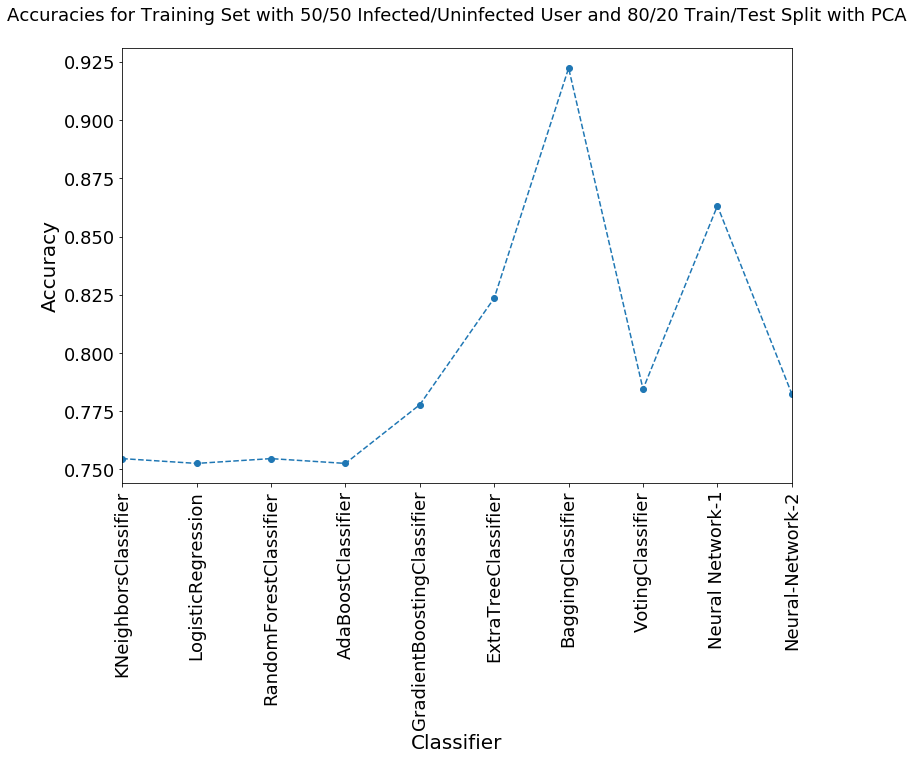

In [144]:
get_accuracy_plot(table_80_50_train_PCA,'Accuracies for Training Set with 50/50 Infected/Uninfected User and 80/20 Train/Test Split with PCA')

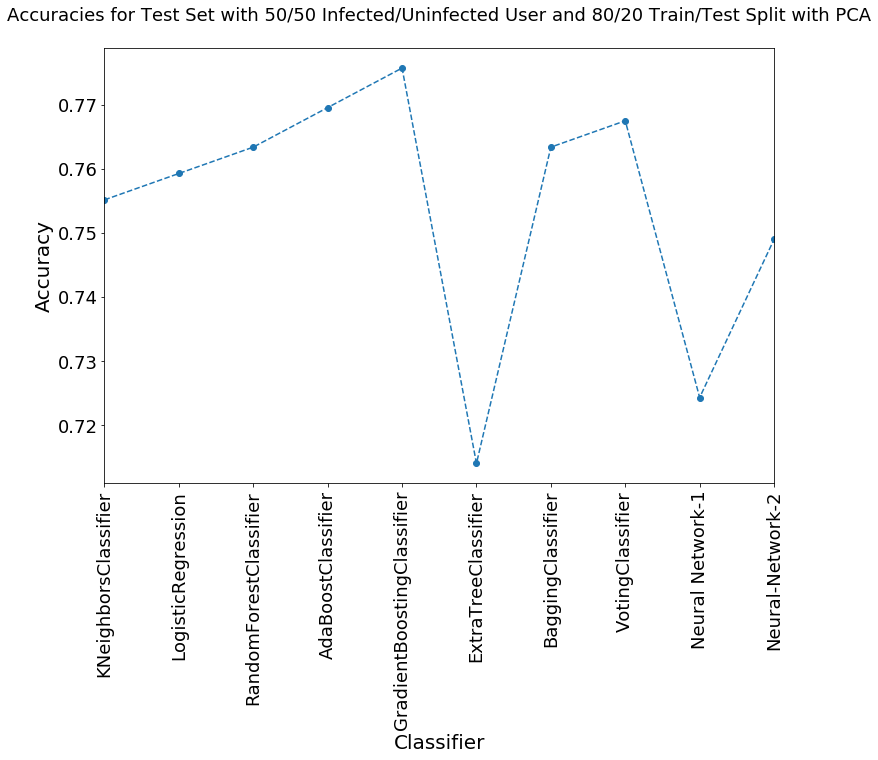

In [145]:
get_accuracy_plot(table_80_50_test_PCA,'Accuracies for Test Set with 50/50 Infected/Uninfected User and 80/20 Train/Test Split with PCA')

<a id='2' style="text-decoration : none; color : #000000;"><h3>2. 30:70 Infected/Uninfected Users</h3.</a>

In [154]:
z=pd.read_csv('Feature_with_Hour_Class_70_30.csv')
z.set_index(['Source_User'],drop=True,inplace=True)

In [155]:
z.columns=['Number of Records','Average Size of Packets Received','Average Size of Packets Sent','Average Elapsed Time',
           'Average number of Bytes sent', 'Average number of Bytes received','Number of different Source Ports',
           'Number of different Destination Ports', 'Number of different Applications','Number of different Source IP',
           'Number of different Destination IP','Target','Average differnce in Received Time',
          'Number of Sessions at 00:00','Number of Sessions at 01:00','Number of Sessions at 02:00','Number of Sessions at 03:00',
          'Number of Sessions at 04:00','Number of Sessions at 05:00','Number of Sessions at 06:00',
          'Number of Sessions at 07:00','Number of Sessions at 08:00','Number of Sessions at 09:00',
          'Number of Sessions at 10:00','Number of Sessions at 11:00','Number of Sessions at 12:00',
          'Number of Sessions at 13:00','Number of Sessions at 14:00','Number of Sessions at 15:00',
          'Number of Sessions at 16:00','Number of Sessions at 17:00','Number of Sessions at 18:00',
          'Number of Sessions at 19:00','Number of Sessions at 20:00','Number of Sessions at 21:00',
          'Number of Sessions at 22:00','Number of Sessions at 23:00']

In [161]:
z.Target.value_counts()

0    2832
1    1215
Name: Target, dtype: int64

In [156]:
print("The feature vector for infected users and sample of uninfected users")

The feature vector for infected users and sample of uninfected users


In [157]:
z=z.sample(frac=1)
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

,Number of Records,Average Size of Packets Received,Average Size of Packets Sent,Average Elapsed Time,Average number of Bytes sent,Average number of Bytes received,Number of different Source Ports,Number of different Destination Ports,Number of different Applications,Number of different Source IP,Number of different Destination IP,Average differnce in Received Time,Number of Sessions at 00:00,Number of Sessions at 01:00,Number of Sessions at 02:00,Number of Sessions at 03:00,Number of Sessions at 04:00,Number of Sessions at 05:00,Number of Sessions at 06:00,Number of Sessions at 07:00,Number of Sessions at 08:00,Number of Sessions at 09:00,Number of Sessions at 10:00,Number of Sessions at 11:00,Number of Sessions at 12:00,Number of Sessions at 13:00,Number of Sessions at 14:00,Number of Sessions at 15:00,Number of Sessions at 16:00,Number of Sessions at 17:00,Number of Sessions at 18:00,Number of Sessions at 19:00,Number of Sessions at 20:00,Number of Sessions at 21:00,Number of Sessions at 22:00,Number of Sessions at 23:00
Source_User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8c8d63c29001941282625da51ded54c9305c2b2c5ed680ef803b61b1231a2107,3213,42.012138,25.187053,111.732960,6588.886710,47322.154062,2731.0,107.0,47,54,799,830.420791,178,198,213,196,208,184,171,89,76,53,71,181,97,110,58,99,67,185,85,134,124,143,106,187
d5387d6633bcb2623da3a59fb226a035a67327ccbd59f06cd8f6a2729f7b5572,2125,94.389176,37.080471,39.697882,3654.621647,113579.744941,2005.0,13.0,32,11,311,1250.282824,39,116,73,196,223,151,128,87,67,50,26,53,36,73,34,102,70,72,193,138,53,58,44,43


In [159]:
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


Source_User
8c8d63c29001941282625da51ded54c9305c2b2c5ed680ef803b61b1231a2107    1
d5387d6633bcb2623da3a59fb226a035a67327ccbd59f06cd8f6a2729f7b5572    1
19fd356768bb38f9945828228d569c61f17e58aa19864c851fb15e650cec79b6    0
fd25d90a6cb3334e65c9d2327ff234e6e5f4e1b00ad9731059255ca0cb69c189    1
9e855f8075e9594d0c8b5c7964d531da2d067d3fc7fb439d15df1ea4ac990c82    0
c82f6e8bc1c7eabef356b523deb1a05e3d40abf50711584de03385f7da69d3f4    0
9689960152606d4f9646ab11c743133fa855e9c03ee8f54868cadf877c592035    0
4705c1eda282c130a47c9f69b42ac84c23219f364c29e6acbac87de2af33fc63    0
4fc9915a7e5056ca16b4fbe8f285343edcacc3694551ebb930b25f84f0be57be    1
3945a07aeac270ab0494ce64d18a92a5df1da1c8786f2765b6ec1629ded1b52f    1
Name: Target, dtype: int64

<a id='1.A' style="text-decoration : none; color : #000000;"><h3>80:20 Train/Test Split</h3.</a>

In [160]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [163]:
table_80_75_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_75_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [164]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,euclidean,30,uniform



Accuracy of the  KNN  model for training data is: 0.761507568736

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2039  229     2268
1           490  479      969
__all__    2529  708     3237

Accuracy of the  KNN  model for test data is: 0.741975308642

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          496   68      564
1          141  105      246
__all__    637  173      810

In [166]:
knn=KNeighborsClassifier(n_neighbors=30,weights='uniform',leaf_size=2,metric='euclidean',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_80_75_train.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_80_75_test.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [167]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.7,False,True,0.7,100,ovr,l2,sag,0.1



Accuracy of the  Logistic  model for training data is: 0.772011121409

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2015  253     2268
1           495  474      969
__all__    2510  727     3237

Accuracy of the  Logistic  model for test data is: 0.756790123457

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          499   65      564
1          132  114      246
__all__    631  179      810

In [168]:
logistic=LogisticRegression(C=0.7,dual=False,fit_intercept=True,intercept_scaling=0.7,max_iter=100,multi_class='ovr',penalty='l2',solver='sag',tol=0.1)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_80_75_train.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_80_75_test.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [169]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.776953969725


Predicted     0    1  __all__
Actual                       
0          1948  320     2268
1           402  567      969
__all__    2350  887     3237

Accuracy of Random Forest Model on test data is: 0.751851851852


Predicted    0    1  __all__
Actual                      
0          472   92      564
1          109  137      246
__all__    581  229      810

In [170]:
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_80_75_train.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_80_75_test.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

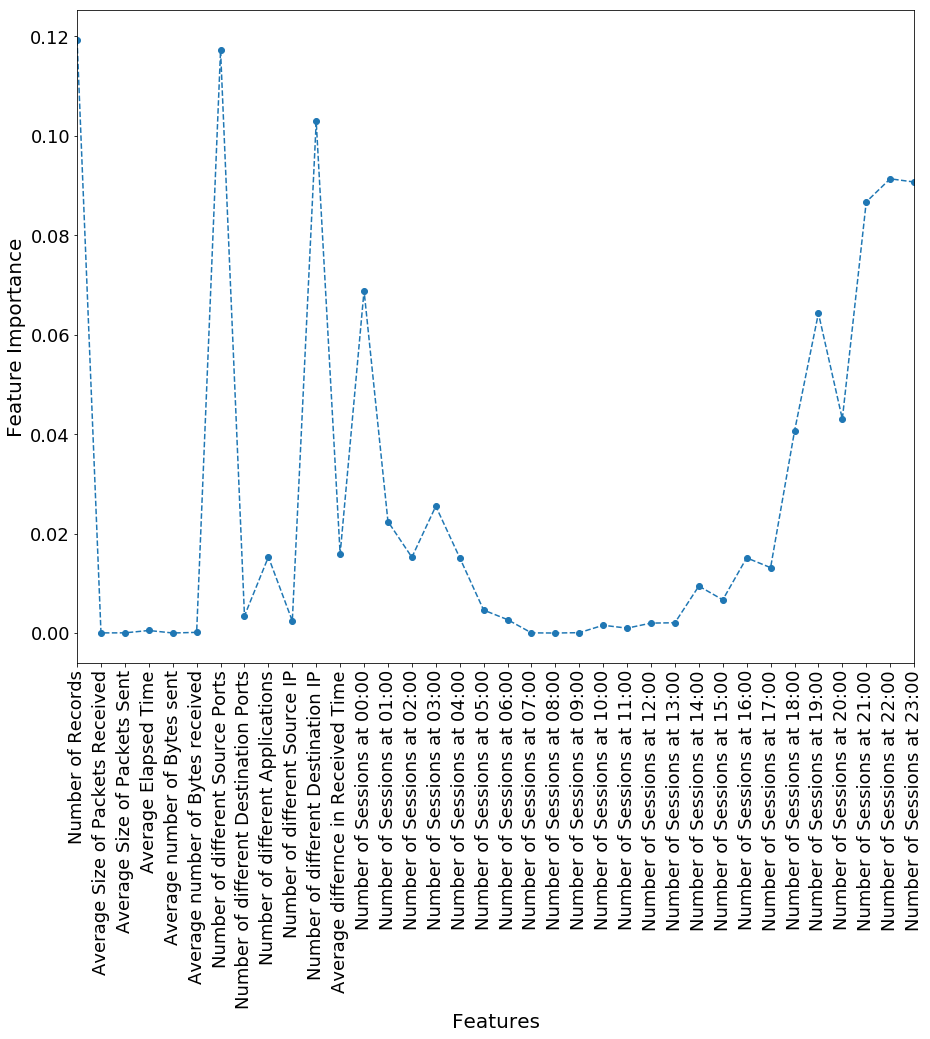

In [171]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [172]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME,1.5,50,0



Accuracy of the  AdaBoostClassifier  model for training data is: 0.768612913191

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1972  296     2268
1           406  563      969
__all__    2378  859     3237

Accuracy of the  AdaBoostClassifier  model for test data is: 0.738271604938

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          464  100      564
1          112  134      246
__all__    576  234      810

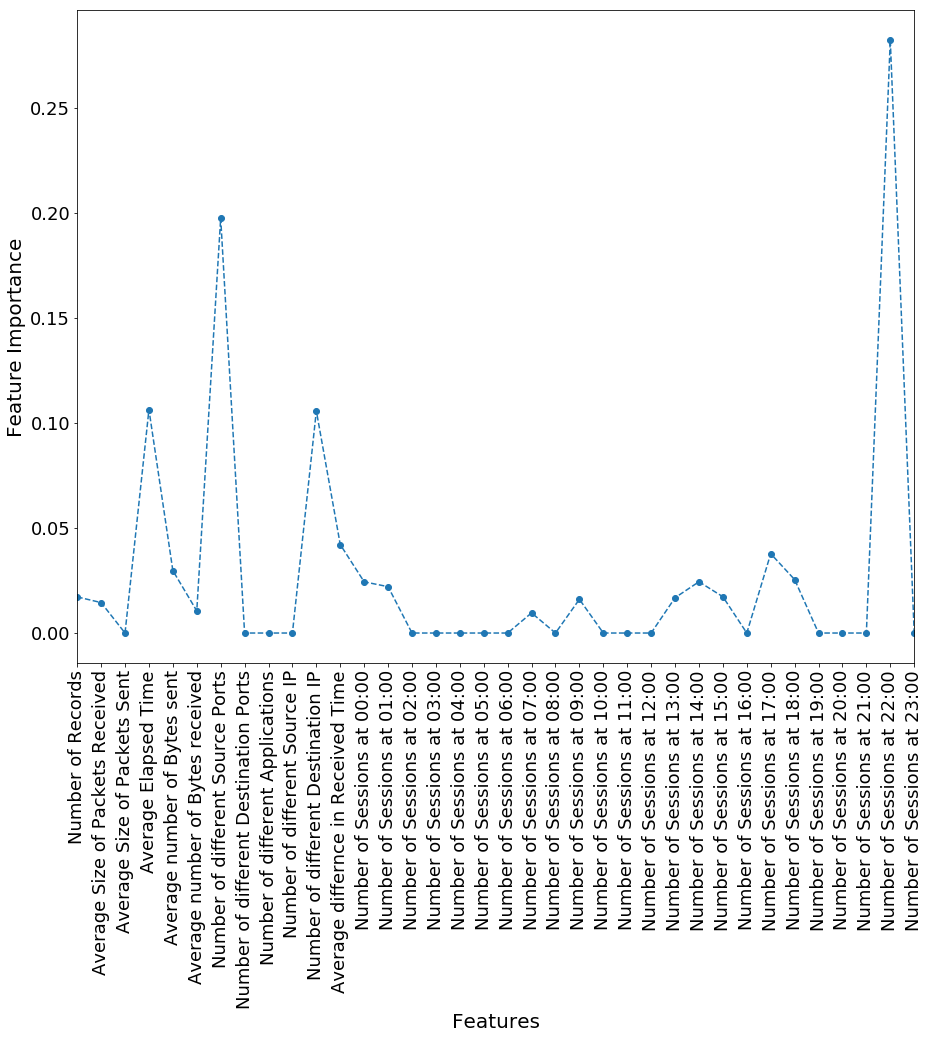

In [173]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=1.5,n_estimators=50,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_80_75_train.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_80_75_test.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [174]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


,0,1,2,3,4,5,6
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state
0,mse,0.03,deviance,10,0.1,50,0



Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.767377201112

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2037  231     2268
1           423  546      969
__all__    2460  777     3237

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.77037037037

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          496   68      564
1          118  128      246
__all__    614  196      810

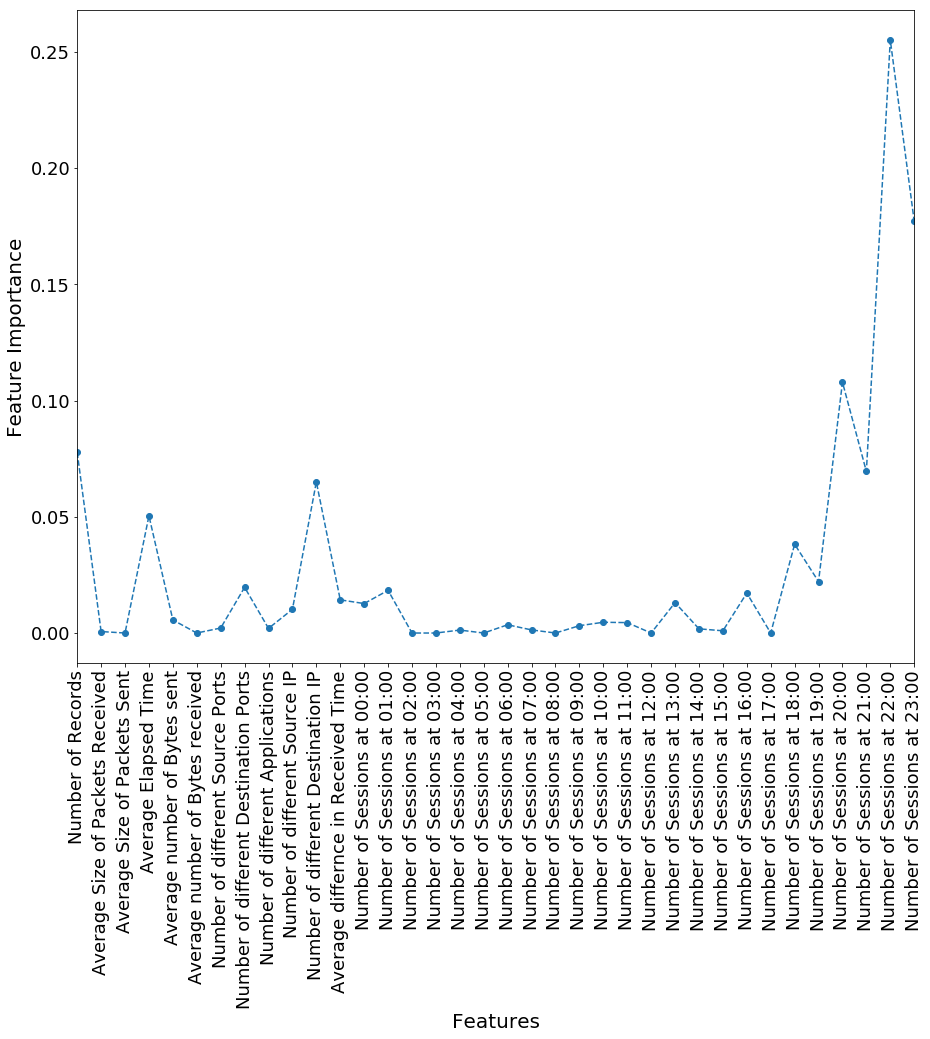

In [175]:
gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=10,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_80_75_train.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_80_75_test.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [176]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,entropy,10,auto,0.001,5,2,0,random



Accuracy of the  Extra Decision Tree  model for training data is: 0.767686129132

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1987  281     2268
1           502  467      969
__all__    2489  748     3237

Accuracy of the  Extra Decision Tree  model for test data is: 0.735802469136

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          485   79      564
1          135  111      246
__all__    620  190      810

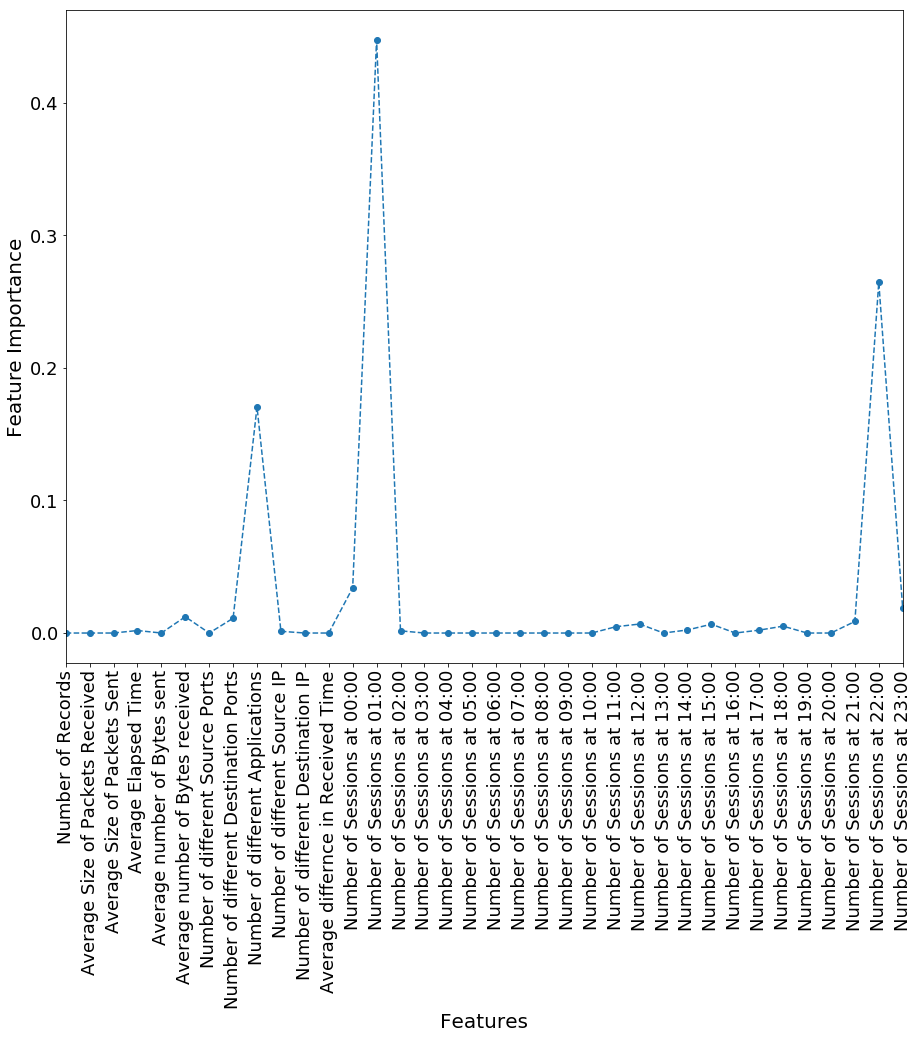

In [177]:
ext_tree=ExtraTreeClassifier(criterion='entropy',max_depth=10,max_features='auto',min_impurity_decrease=0.0001,min_samples_leaf=5,
                            min_samples_split=2,random_state=0,splitter='random')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_80_75_train.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_80_75_test.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [178]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.4,0.4,1000,True,0



Accuracy of the  Bagging  model for training data is: 0.776645041705

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2259    9     2268
1           118  851      969
__all__    2377  860     3237

Accuracy of the  Bagging  model for test data is: 0.774074074074

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          475   89      564
1           94  152      246
__all__    569  241      810

In [179]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.4,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_80_75_train.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_80_75_test.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [180]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.804757491504


Predicted     0    1  __all__
Actual                       
0          2012  256     2268
1           376  593      969
__all__    2388  849     3237

The test accuracy is: 0.764197530864


Predicted    0    1  __all__
Actual                      
0          480   84      564
1          107  139      246
__all__    587  223      810

In [181]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_80_75_train.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_80_75_test.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [182]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 0.967871485944


Predicted     0    1  __all__
Actual                       
0          2255   13     2268
1            91  878      969
__all__    2346  891     3237

The accuracy of the model on test data is: 0.734567901235


Predicted    0    1  __all__
Actual                      
0          469   95      564
1          120  126      246
__all__    589  221      810

In [183]:
table_80_75_train.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_80_75_test.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [184]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.6min finished


The accuracy of the model on training data is: 0.809082483781


In [185]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted     0    1  __all__
Actual                       
0          1990  278     2268
1           340  629      969
__all__    2330  907     3237

The accuracy of the model on test data is: 0.753086419753


Predicted    0    1  __all__
Actual                      
0          470   94      564
1          106  140      246
__all__    576  234      810

In [186]:
table_80_75_train.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_80_75_test.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [188]:
table_80_75_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_75_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_75_test.set_index(['index'],drop=True,inplace=True)
table_80_75_train.set_index(['index'],drop=True,inplace=True)

<a id='1.A.A' style="text-decoration : none; color : #000000;"><h3>Comparision Table and Graphs </h3></a>

In [189]:
print("Comparision Table for Training Accuracies:")
display(table_80_75_train)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.777881,479.0,2039.0,229.0,490.0,0.505676,0.100970
LogisticRegression,0.767686,472.0,2013.0,255.0,497.0,0.512900,0.112434
RandomForestClassifier,0.776954,567.0,1948.0,320.0,402.0,0.414861,0.141093
AdaBoostClassifier,0.783133,563.0,1972.0,296.0,406.0,0.418989,0.130511
GradientBoostingClassifier,0.797961,546.0,2037.0,231.0,423.0,0.436533,0.101852
ExtraTreeClassifier,0.768922,717.0,1772.0,496.0,252.0,0.260062,0.218695
BaggingClassifier,0.960766,851.0,2259.0,9.0,118.0,0.121775,0.003968
VotingClassifier,0.804757,593.0,2012.0,256.0,376.0,0.388029,0.112875
Neural Network-1,0.967871,878.0,2255.0,13.0,91.0,0.093911,0.005732


In [190]:
print("Comparision Table for Test Accuracies:")
display(table_80_75_test)

Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.741975,105.0,496.0,68.0,141.0,0.573171,0.120567
LogisticRegression,0.755556,115.0,497.0,67.0,131.0,0.532520,0.118794
RandomForestClassifier,0.751852,137.0,472.0,92.0,109.0,0.443089,0.163121
AdaBoostClassifier,0.738272,134.0,464.0,100.0,112.0,0.455285,0.177305
GradientBoostingClassifier,0.770370,128.0,496.0,68.0,118.0,0.479675,0.120567
ExtraTreeClassifier,0.749383,176.0,431.0,133.0,70.0,0.284553,0.235816
BaggingClassifier,0.774074,152.0,475.0,89.0,94.0,0.382114,0.157801
VotingClassifier,0.764198,139.0,480.0,84.0,107.0,0.434959,0.148936
Neural Network-1,0.734568,126.0,469.0,95.0,120.0,0.487805,0.168440


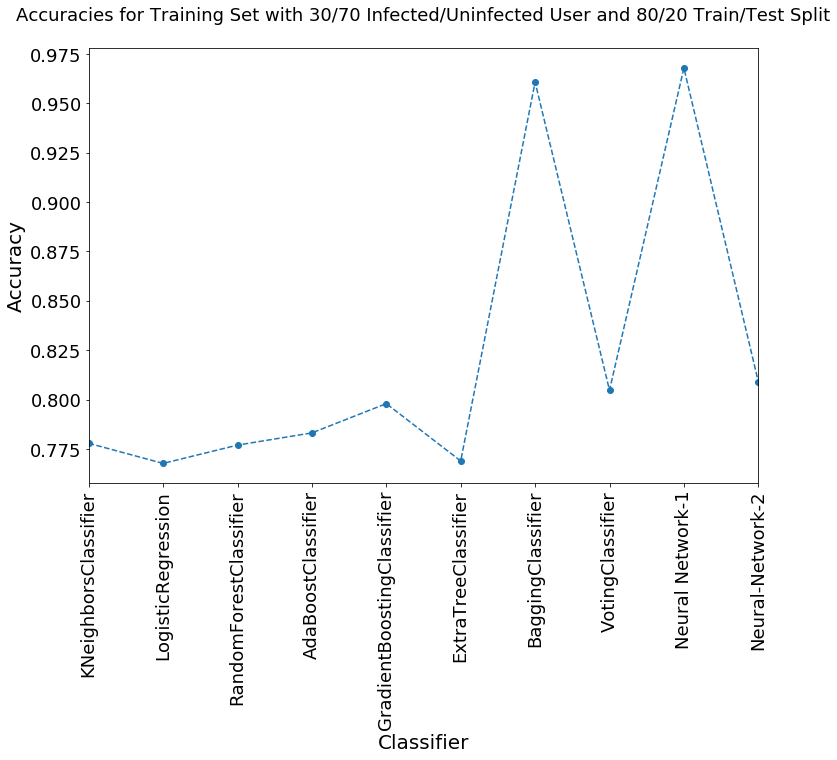

In [191]:
get_accuracy_plot(table_80_75_train,'Accuracies for Training Set with 30/70 Infected/Uninfected User and 80/20 Train/Test Split')

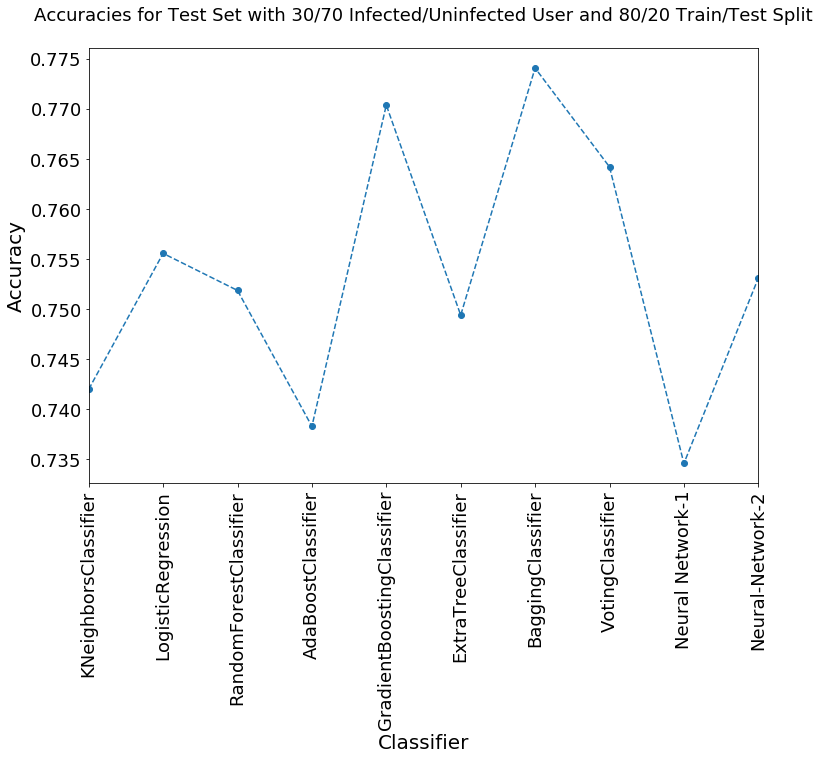

In [192]:
get_accuracy_plot(table_80_75_test,'Accuracies for Test Set with 30/70 Infected/Uninfected User and 80/20 Train/Test Split')

<a id='1.B' style="text-decoration : none; color : #000000;"><h3>80:20 Train/Test Split with PCA</h3.</a>

In [193]:
### With the PCA
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.2)

Variance explained using 13 components is: 0.915033450989
The train/test split ratio is 80:20


In [197]:
table_80_75_train_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_75_test_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [195]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,manhattan,20,distance



Accuracy of the  KNN  model for training data is: 0.755329008341

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2268    0     2268
1             0  969      969
__all__    2268  969     3237

Accuracy of the  KNN  model for test data is: 0.741975308642

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          502   62      564
1          147   99      246
__all__    649  161      810

In [198]:
knn=KNeighborsClassifier(n_neighbors=20,weights='uniform',leaf_size=2,metric='manhattan',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_80_75_train_PCA.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_80_75_test_PCA.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [199]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.7,False,True,0.5,50,multinomial,l2,newton-cg,1e-05



Accuracy of the  Logistic  model for training data is: 0.77015755329

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2003  265     2268
1           477  492      969
__all__    2480  757     3237

Accuracy of the  Logistic  model for test data is: 0.750617283951

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          490   74      564
1          128  118      246
__all__    618  192      810

In [200]:
logistic=LogisticRegression(C=0.7,dual=False,fit_intercept=True,intercept_scaling=0.5,max_iter=50,multi_class='multinomial',penalty='l2',solver='newton-cg',tol=1e-5)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_80_75_train_PCA.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_80_75_test_PCA.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [201]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.736793327155


Predicted     0    1  __all__
Actual                       
0          2189   79     2268
1           773  196      969
__all__    2962  275     3237

Accuracy of Random Forest Model on test data is: 0.723456790123


Predicted    0   1  __all__
Actual                     
0          537  27      564
1          197  49      246
__all__    734  76      810

In [202]:
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_80_75_train_PCA.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_80_75_test_PCA.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

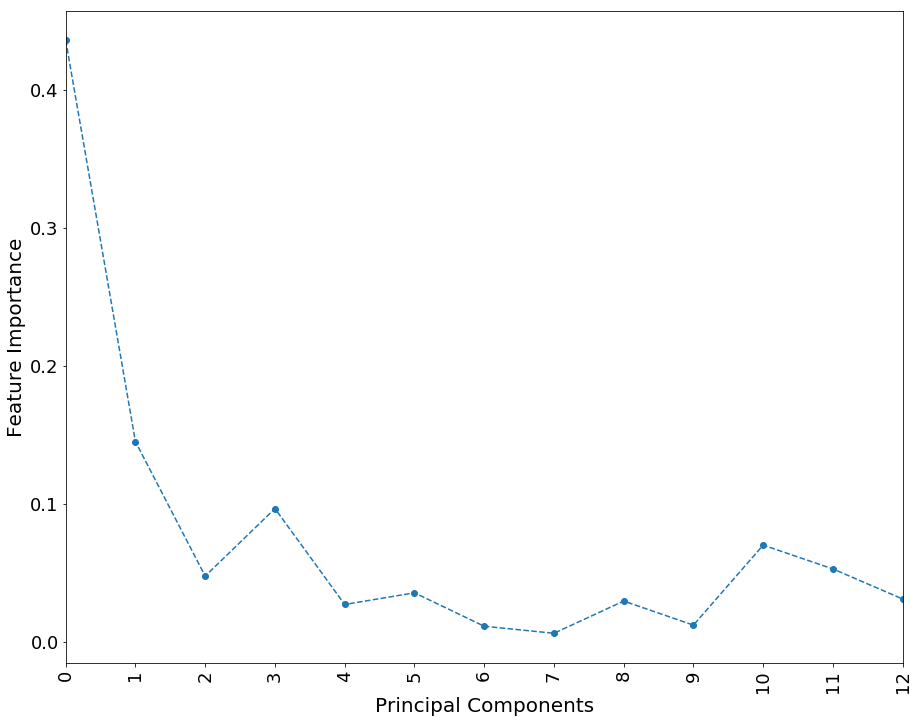

In [203]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [204]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME,0.5,50,0



Accuracy of the  AdaBoostClassifier  model for training data is: 0.767068273092

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1780   488     2268
1           264   705      969
__all__    2044  1193     3237

Accuracy of the  AdaBoostClassifier  model for test data is: 0.745679012346

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          435  129      564
1           77  169      246
__all__    512  298      810

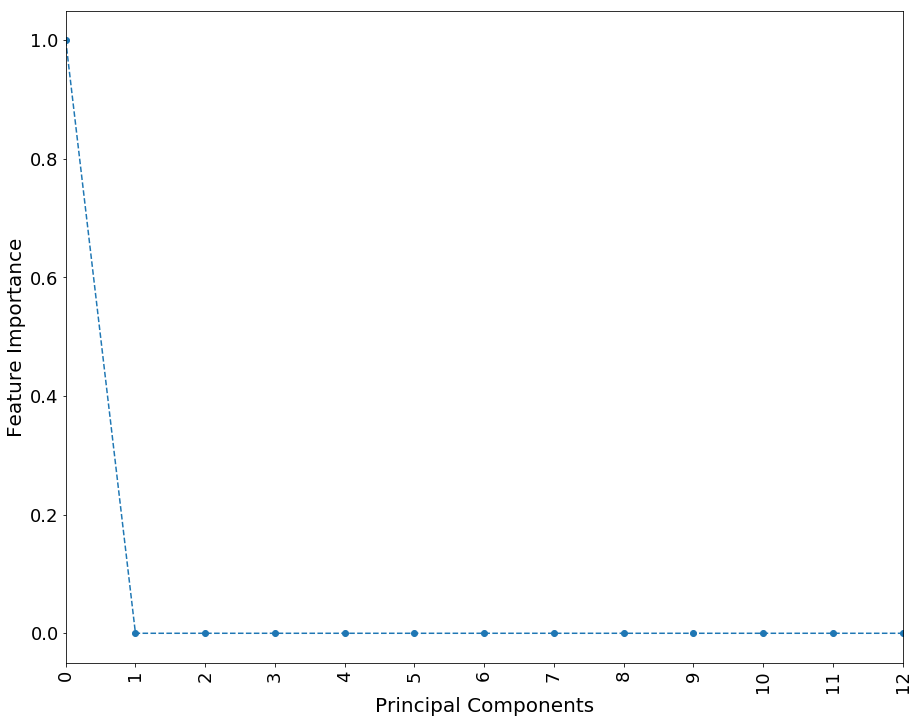

In [205]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.5,n_estimators=50,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_80_75_train_PCA.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_80_75_test_PCA.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [206]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50,100,200], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


,0,1,2,3,4,5,6
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state
0,mse,0.03,exponential,15,0.1,100,0



Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.776953969725

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1973  295     2268
1           371  598      969
__all__    2344  893     3237

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.758024691358

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          479   85      564
1          111  135      246
__all__    590  220      810

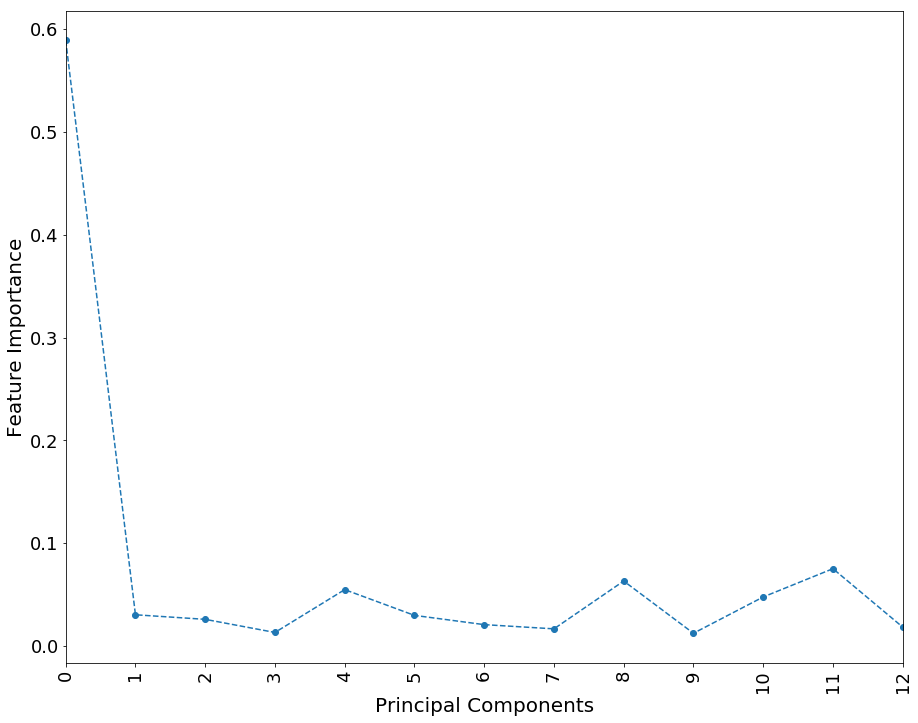

In [207]:
gbc=GradientBoostingClassifier(n_estimators=100,min_samples_leaf=15,min_samples_split=0.1,random_state=0,loss='exponential',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_80_75_train_PCA.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_80_75_test_PCA.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [208]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,gini,10,auto,0.001,5,2,0,best



Accuracy of the  Extra Decision Tree  model for training data is: 0.759345072598

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1988  280     2268
1           413  556      969
__all__    2401  836     3237

Accuracy of the  Extra Decision Tree  model for test data is: 0.73950617284

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          474   90      564
1          121  125      246
__all__    595  215      810

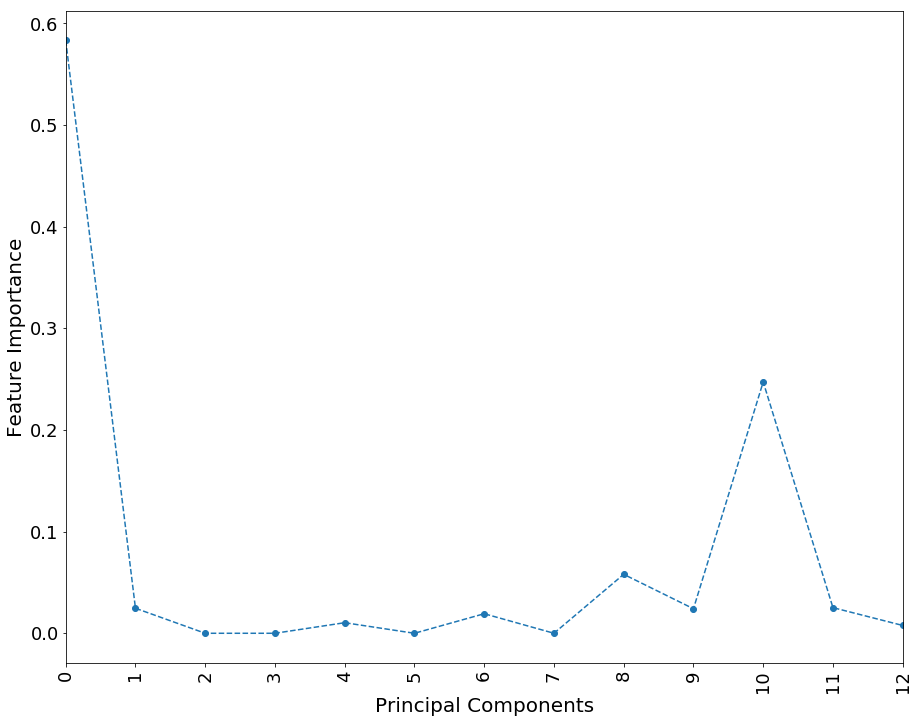

In [209]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=5,
                            min_samples_split=2,random_state=0,splitter='best')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_80_75_train_PCA.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_80_75_test_PCA.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [210]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.4,0.4,1000,True,0



Accuracy of the  Bagging  model for training data is: 0.764905776954

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2265    3     2268
1           112  857      969
__all__    2377  860     3237

Accuracy of the  Bagging  model for test data is: 0.745679012346

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          502   62      564
1          144  102      246
__all__    646  164      810

In [211]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.4,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_80_75_train_PCA.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_80_75_test_PCA.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [212]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.815878900216


Predicted     0    1  __all__
Actual                       
0          2061  207     2268
1           389  580      969
__all__    2450  787     3237

The test accuracy is: 0.759259259259


Predicted    0    1  __all__
Actual                      
0          498   66      564
1          129  117      246
__all__    627  183      810

In [213]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_80_75_train_PCA.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_80_75_test_PCA.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [214]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 0.870868087754


Predicted     0    1  __all__
Actual                       
0          2054  214     2268
1           204  765      969
__all__    2258  979     3237

The accuracy of the model on test data is: 0.737037037037


Predicted    0    1  __all__
Actual                      
0          462  102      564
1          111  135      246
__all__    573  237      810

In [215]:
table_80_75_train_PCA.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_80_75_test_PCA.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [216]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.9min finished


The accuracy of the model on training data is: 0.79765214705


In [217]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted     0    1  __all__
Actual                       
0          1997  271     2268
1           384  585      969
__all__    2381  856     3237

The accuracy of the model on test data is: 0.758024691358


Predicted    0    1  __all__
Actual                      
0          477   87      564
1          109  137      246
__all__    586  224      810

In [218]:
table_80_75_train_PCA.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_80_75_test_PCA.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [219]:
table_80_75_train_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_75_test_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_75_test_PCA.set_index(['index'],drop=True,inplace=True)
table_80_75_train_PCA.set_index(['index'],drop=True,inplace=True)

<h3><a id='1.B.B' style="text-decoration : none; color : #000000;">Comparision Table with Graphs</a></h3>

In [220]:
print("Comparision Table for Training Accuracies:")
display(table_80_75_train_PCA)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.772011,390.0,2109.0,159.0,579.0,0.597523,0.070106
LogisticRegression,0.770775,492.0,2003.0,265.0,477.0,0.492260,0.116843
RandomForestClassifier,0.736793,196.0,2189.0,79.0,773.0,0.797730,0.034832
AdaBoostClassifier,0.767686,705.0,1780.0,488.0,264.0,0.272446,0.215168
GradientBoostingClassifier,0.794254,598.0,1973.0,295.0,371.0,0.382869,0.130071
ExtraTreeClassifier,0.785913,556.0,1988.0,280.0,413.0,0.426213,0.123457
BaggingClassifier,0.964473,857.0,2265.0,3.0,112.0,0.115583,0.001323
VotingClassifier,0.815879,580.0,2061.0,207.0,389.0,0.401445,0.091270
Neural Network-1,0.870868,765.0,2054.0,214.0,204.0,0.210526,0.094356


In [221]:
print("Comparision Table for Test Accuracies:")
display(table_80_75_test_PCA)

Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.738272,84.0,514.0,50.0,162.0,0.658537,0.088652
LogisticRegression,0.750617,118.0,490.0,74.0,128.0,0.520325,0.131206
RandomForestClassifier,0.723457,49.0,537.0,27.0,197.0,0.800813,0.047872
AdaBoostClassifier,0.745679,169.0,435.0,129.0,77.0,0.313008,0.228723
GradientBoostingClassifier,0.758025,135.0,479.0,85.0,111.0,0.451220,0.150709
ExtraTreeClassifier,0.739506,125.0,474.0,90.0,121.0,0.491870,0.159574
BaggingClassifier,0.745679,102.0,502.0,62.0,144.0,0.585366,0.109929
VotingClassifier,0.759259,117.0,498.0,66.0,129.0,0.524390,0.117021
Neural Network-1,0.737037,135.0,462.0,102.0,111.0,0.451220,0.180851


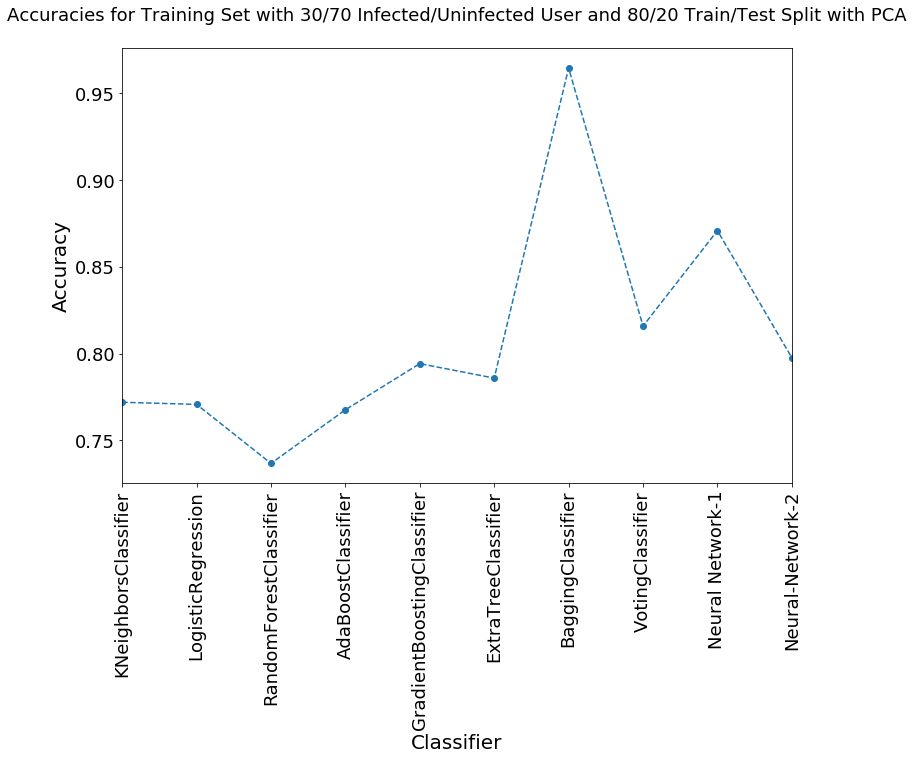

In [223]:
get_accuracy_plot(table_80_75_train_PCA,'Accuracies for Training Set with 30/70 Infected/Uninfected User and 80/20 Train/Test Split with PCA')

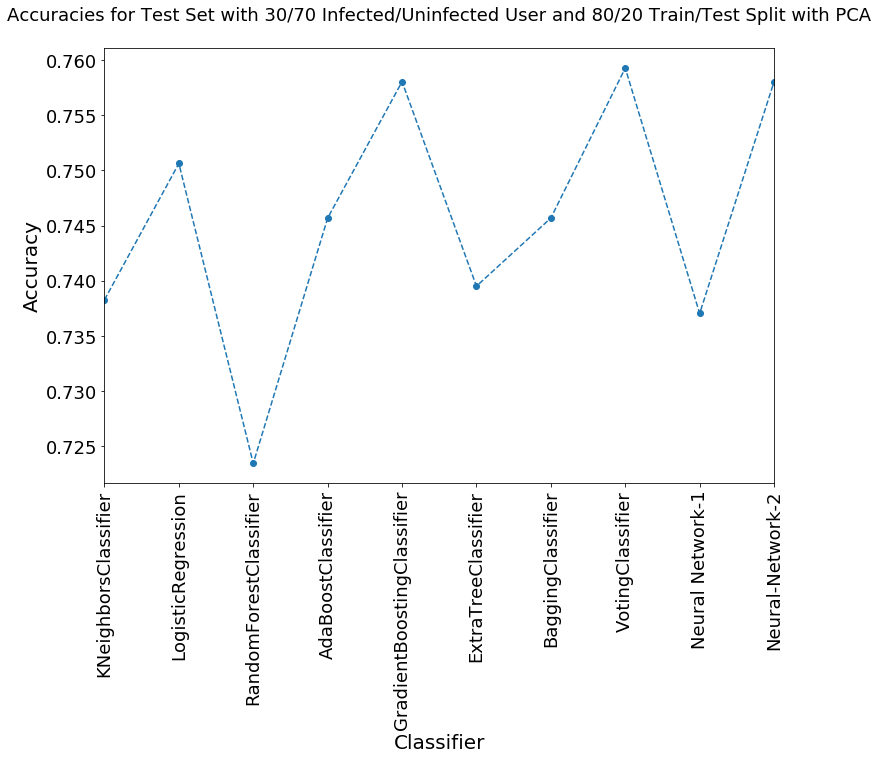

In [224]:
get_accuracy_plot(table_80_75_test_PCA,'Accuracies for Test Set with 30/70 Infected/Uninfected User and 80/20 Train/Test Split with PCA')

In [225]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')